# Digital Image Processing Lab 4

## M. Shaheer Ijaz
## 01-134212-127 
## BS ( CS ) 7-B

In [ ]:
pip install opencv-python

In [ ]:
pip install matplotlib

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

----
----


## Task # 1

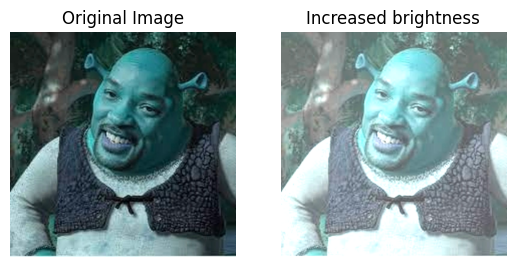

In [9]:
img = cv2.imread('img2.jpeg')
alpha = 1.0
beta = 90

new_img = np.zeros(img.shape, img.dtype)
new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('OFF')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(new_image)
plt.title("Increased brightness")

plt.show()


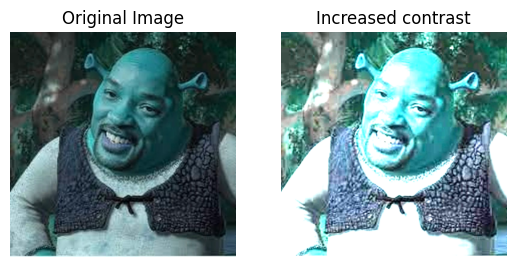

In [11]:
img = cv2.imread('img2.jpeg')
alpha = 2.6
beta = 0

new_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('OFF')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(new_image)
plt.title("Increased contrast")

plt.show()

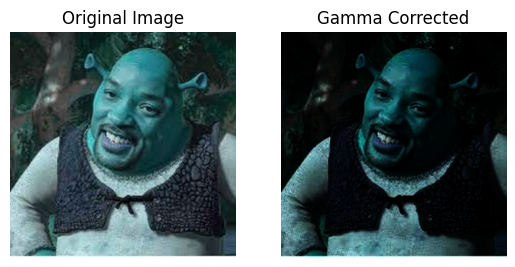

In [10]:
img = cv2.imread('img2.jpeg')
gamma = 2.5

lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

res = cv2.LUT(img, lookUpTable)



plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('OFF')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(res)
plt.title("Gamma Corrected")

plt.show()


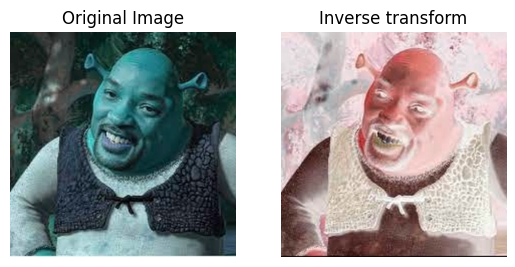

In [12]:
img = cv2.imread('img2.jpeg')

new_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
            new_image[y,x] = 255 - img[y,x]

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('OFF')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(new_image)
plt.title("Inverse transform")

plt.show()

---

---

## Task # 2

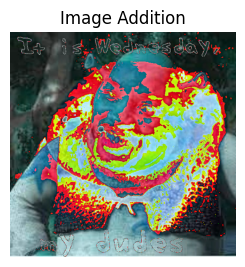

In [13]:
img = cv2.imread('img2.jpeg')
img2 = cv2.imread('img1.jpeg')

img = cv2.resize(img, (600, 600), interpolation = cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (600, 600), interpolation = cv2.INTER_LINEAR)

#added_img = cv2.addWeighted(img,0.4,img2,0.6,0)
added_img = img + img2

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(added_img)
plt.title("Image Addition")

plt.show()



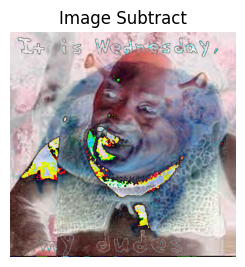

In [14]:
img = cv2.imread('img1.jpeg')
img2 = cv2.imread('img2.jpeg')

img = cv2.resize(img, (600, 600), interpolation = cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (600, 600), interpolation = cv2.INTER_LINEAR)

#added_img = cv2.addWeighted(img,0.4,img2,0.6,0)
added_img = img - img2

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(added_img)
plt.title("Image Subtraction")

plt.show()



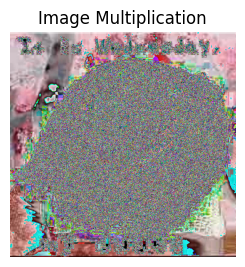

In [20]:
img = cv2.imread('img1.jpeg')
img2 = cv2.imread('img2.jpeg')

img = cv2.resize(img, (600, 600), interpolation = cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (600, 600), interpolation = cv2.INTER_LINEAR)

#added_img = cv2.addWeighted(img,0.4,img2,0.6,0)
added_img = img * img2

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(added_img)
plt.title("Image Multiplication")

plt.show()



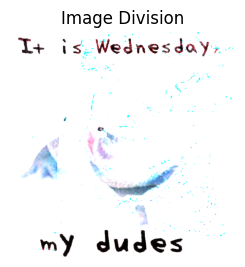

In [19]:
img = cv2.imread('img1.jpeg')
img2 = cv2.imread('img2.jpeg')

img = cv2.resize(img, (600, 600), interpolation = cv2.INTER_LINEAR)
img2 = cv2.resize(img2, (600, 600), interpolation = cv2.INTER_LINEAR)

added_img = cv2.divide(img, img2, scale=255)
#added_img = img / img2

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(added_img)
plt.title("Image Division")

plt.show()



---

---

## Task # 3

In [21]:
greenscreen_img = cv2.imread('img3.jpeg')
backgroundImage = cv2.imread('bg1.jpeg')
backgroundImage = cv2.resize(backgroundImage, (greenscreen_img.shape[1], greenscreen_img.shape[0]))
print(greenscreen_img.shape)
print(backgroundImage.shape)


(168, 299, 3)
(168, 299, 3)


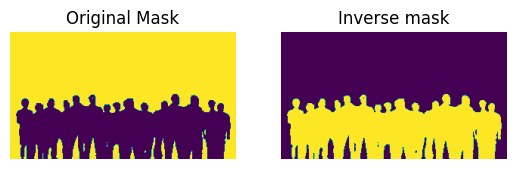

In [27]:
greenHSV = cv2.cvtColor(greenscreen_img,cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(greenHSV,lower_green,upper_green)
mask_inv = cv2.bitwise_not(mask)

plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.axis('OFF')
plt.title("Original Mask")

plt.subplot(1, 2, 2)
plt.axis('OFF')
plt.imshow(mask_inv)
plt.title("Inverse mask")

plt.show()

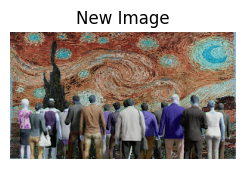

In [30]:
fg_part = cv2.bitwise_and(greenscreen_img,greenscreen_img,mask=mask_inv)
bg_part = cv2.bitwise_and(backgroundImage,backgroundImage,mask=mask)

new_image = fg_part + bg_part

plt.subplot(1, 2, 1)
plt.imshow(new_image)
plt.axis('OFF')
plt.title("New Image")

plt.show()


---

---

## Task # 4

In [3]:
img1 = cv2.imread('Picture1.jpg')
img2 = cv2.imread('Picture2.jpg')

print(img1.shape)
print(img2.shape)

(459, 812, 3)
(459, 812, 3)


In [8]:
res = cv2.subtract(img2,img1)
cv2.imshow('image', res)
cv2.waitKey(0)
cv2.destroyAllWindows()